In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

의사 결정 트리(Decision Tree)  
  
데이터 분류 및 회귀에 사용되는 지도 학습 알고리즘으로 결과값이 어떻게 나왔는지 이해하기가 가장 쉽다는 것이다. 또한 높은 정확도 역시 상당히 큰 장점이다 .   
하지만 과대 적합되기 쉬운 알고리즘이라는 단점도 있다 .  
  
의사 결정 트리 알고리즘은 스무고개와 상당히 비슷하다. 데이터의 특징을 바탕으로 데이터를 연속적으로 분리하다 보면 결국 하나의 정답으로 데이터를 분류할 수 있는데
스무고개에서 적은 질문으로 정답을 맞추기 위해서는 의미있는 질문을 먼저하는 것이 중요하듯이 의사 결정 트리에서도 의미있는 질문을 먼저 하는것이 상당히 중요하다.  
데이터의 특징 속에서 분류에 큰 영향을 끼치는 특징을 발견하고 상위 노드를 선택하는 것이 의사 결정 트리 알고리즘의 핵심이다.  

스무고개를 할 때 질문자는 질문을 하나 던질때 마다 약간씩의 정보를 획득한다. 약간씩의 정보를 획득하는 과정은 정답에 대한 불확실성이 조금씩 줄어든다는 것과 같은
개념이다. 정보 이론(Information Theory)에서는 이 불확실성을 수치적으로 표한한 값을 엔트로피(Entropy)라고 표현하며 정보 이득(Information Gain)은 질문 이전의  
엔트로피 에서 질문 후의 엔트로피를 뺀 값이 된다. 즉, 불확실성이 줄어든 정도를 정보 이득이라고 한다.

지니계수(Gini Index)

P ** 2 + Q ** 2 으로 계산하며 불순도를 측정하는 지표로 데이터의 통계적 분석 정도를 정량화해서 표현한 것을 의미한다.  
사이킷런의 의사 결정 트리는 CART 타입의 의사 결정 트리이며 CART는 트리의 노드마다 특징을 이진 분류하는 특징이 있기 때문에 사이킷 런은 의사 결정 트리를  
구성할 때 지니계수를 사용한다. 

<img src="./images/decision.png" align="left">

문제 정의  

서울 지역(구)의 위도와 경도 정보를 학습해서 임의로 입력된 지역(동)을 강동, 강서, 강남, 강북으로 분류하는 모델을 구현한다.    
즉, 특정 지역이 강동인지 강서인지 아니면 강남인지 강북인지 알아내는 모델을 구현한다.  
  
데이터 획득  

In [2]:
# 구 데이터 
district_dict_list = [
            {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
            {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
            {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
            {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
            {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
            
            {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
            {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
            {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
            {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
            {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},
   
            {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
            {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
            {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
            {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
            {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},
     
            {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
            {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
            {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
            {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
            {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
         ]
# 동데이터 
dong_dict_list = [
            {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
            {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
            {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
            {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
            {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},
            
            {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
            {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
            {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
            {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
            {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},
    
            {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
            {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
            {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
            {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
            {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},
    
            {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
            {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
            {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
            {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
            {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
         ]

In [3]:
train_df = pd.DataFrame(district_dict_list)
train_df.head()

,district,latitude,longitude,label
0,Gangseo-gu,37.551000,126.849500,Gangseo
1,Yangcheon-gu,37.524240,126.855396,Gangseo
2,Guro-gu,37.495400,126.887400,Gangseo
3,Geumcheon-gu,37.451900,126.902000,Gangseo
4,Mapo-gu,37.560229,126.908728,Gangseo


In [4]:
test_df = pd.DataFrame(dong_dict_list)
test_df.head()

,dong,latitude,longitude,label
0,Gaebong-dong,37.489853,126.854547,Gangseo
1,Gochuk-dong,37.501394,126.859245,Gangseo
2,Hwagok-dong,37.537759,126.847951,Gangseo
3,Banghwa-dong,37.575817,126.815719,Gangseo
4,Sangam-dong,37.577039,126.891620,Gangseo


학습 데이터와 테스트 데이터의 분포를 확인한다.

In [5]:
# 학습 데이터의 레이블은 강동, 강남, 강북, 강서로 총 4개의 값으로 5개씩 일정한 양으로  분포되어 있음을 확인할 수 있다. 
print('train_df.label')
print(train_df.label.value_counts())
print('test_df.label')
print(test_df.label.value_counts())

train_df.label
Gangnam     5
Gangdong    5
Gangseo     5
Gangbuk     5
Name: label, dtype: int64
test_df.label
Gangnam     5
Gangdong    5
Gangseo     5
Gangbuk     5
Name: label, dtype: int64


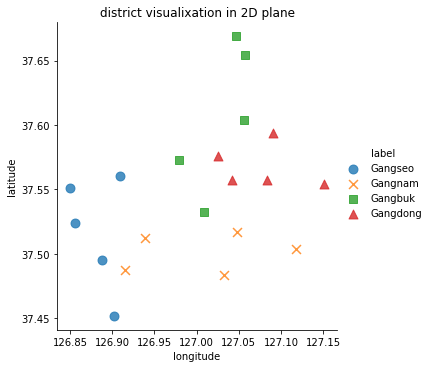

In [6]:
sns.lmplot(data=train_df, x='longitude', y='latitude', fit_reg=False, hue='label', scatter_kws={'s':80}, markers=['o','x','s','^'])
plt.title('district visualixation in 2D plane')
plt.show()

데이터 전처리  
위의 시각화를 통해 구 이름과 동 이름이 학습이나 테스트에 별 영향을 미치지 않는다는 점을 알았으므로 학습 및 테스트에 필요 없는 특징(피쳐)을 데이터에서 제거한다.

In [7]:
# 학습 데이터에서 구 제거 
train_df =train_df.drop('district', axis =1)

train_df.head()

,latitude,longitude,label
0,37.551000,126.849500,Gangseo
1,37.524240,126.855396,Gangseo
2,37.495400,126.887400,Gangseo
3,37.451900,126.902000,Gangseo
4,37.560229,126.908728,Gangseo


In [8]:
# 테스트 데이터에서 동 제거 
test_df.drop('dong',axis=1,inplace=True)
test_df.head()

,latitude,longitude,label
0,37.489853,126.854547,Gangseo
1,37.501394,126.859245,Gangseo
2,37.537759,126.847951,Gangseo
3,37.575817,126.815719,Gangseo
4,37.577039,126.891620,Gangseo


모델 학습  
사이킷런의 의사 결정 트리를 로드해서 학습시킨다.


In [9]:
X_train = train_df[['longitude', 'latitude']]
Y_train = train_df[['label']]
X_test = test_df[['longitude','latitude']]
Y_test = test_df[['label']]

In [10]:
# 데이터를 모델화시키고 학습을 시키기 위해서 숫자로 만들기 위해서 import 한다 .
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() # LabelEncoder 객체를 만든다. 
y_encoded = le.fit_transform(Y_train) # 문자로 되어있는 레이블을 숫자로 만든다.
print(y_encoded)
# classes_: LabelEncoder 객체를 사용해 숫자로 변환한 원래 레이블 데이터
print(le.classes_)

[3 3 3 3 3 2 2 2 2 2 0 0 0 0 0 1 1 1 1 1]
['Gangbuk' 'Gangdong' 'Gangnam' 'Gangseo']


In [11]:
# 사이킷런의 의사 결정 트리를 사용하기 위해 import한다.
from sklearn.tree import DecisionTreeClassifier
# DecisionTreeClassifier 객체로 의사 결정 트리를 학습시킨다.
# 사이킷런 의사 결정 트리 내부 알고리즘 구동시 random 하게 특성들과 데이터 건수를 선택하는 로직이 포함되어 있기 때문에
# random_state 속성의 특정 값을 지정하여 수행시마다 동일한 트리를 만들수 있도록 한다.
clf = DecisionTreeClassifier(random_state=35).fit(X_train, y_encoded)


학습된 의사 결정 트리 시각화

In [12]:
# 학습된 의사 결정 트리를 시각화 하는 함수 
def display_decision_surface(clf, x, y):
    # 차트 크기
    x_min = x.longitude.min() - 0.01
    x_max = x.longitude.max() + 0.01
    y_min = x.latitude.min() - 0.01
    y_max = x.latitude.max() + 0.01
    
    n_classes = len(le.classes_) # 레이블 개수
    plot_color = 'rywb' # 차트에 사용할 포인트 색상
    plot_step = 0.001 # 차트의 눈금 간격
    # print(n_classes)
    # meshgrid(): 좌표 벡터로 부터 좌표 행렬을 반환한다.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
   # print(Z)
    Z = Z.reshape(xx.shape)    
    #print('type: {}'.format(type(Z)))
    #print('shape: {}, dimension: {}, type: {}'.format(Z.shape, Z.ndim, Z.dtype))    
    #print('array data\n', Z, sep='')
    
    # 등고선 차트
    plt.contourf(xx, yy, Z, cmap = plt.cm.RdYlBu)
    
    for i, color in zip(range(n_classes), plot_color):
        # print(i,color)
        # where(): 조건에 맞는 값의 인덱스를 찾는다.
        idx = np.where(y == i)
        # print(idx)
        plt.scatter(x=x.loc[idx].longitude, y=x.loc[idx].latitude, c=color, label = le.classes_[i], cmap=plt.cm.RdYlBu, edgecolors='black', s= 80)
    
    plt.title('Decision surface of a decision tree', fontsize=14)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, fontsize= 14)# 범례
    plt.xlabel('longitude',fontsize=14) # x축 제목
    plt.ylabel('latitude',fontsize=14) # y축제목
        
    plt.rcParams['figure.figsize'] = [12,8] # 차트 크기
    plt.rcParams['xtick.labelsize'] = 10
    plt.rcParams['ytick.labelsize'] = 10
    
    plt.show()

의사 결정 트리는 과대 적합되기 상당히 쉬운 모델이다.  
사이킷런의 의사 결정 트리는 과대 적합을 피할수 있도록 별도의 파라미터를 제공하는데 제공되는 파라미터를 설정하기 않을 경우 모델은 학습되지만 과대 적합될 가능성 
이 상당히 높다 .  
여기서는 아무런 파라미터 설정 없이 학습 데이터를 학습한 의사 결정 트리를 결정 표면 (색으로 표시되는 부분)을 시각화 해보았다. 아래 차트는 강북 사이에 강동에 해당 되는 데이터가 보이고 강동사이에 강북에 해당되는 데이터가 보이는 것으로 봐서 학습 데이터에만 너무 치우치게 학습되었다. 즉, 과대 적합되었다고 판단할 수 있다.

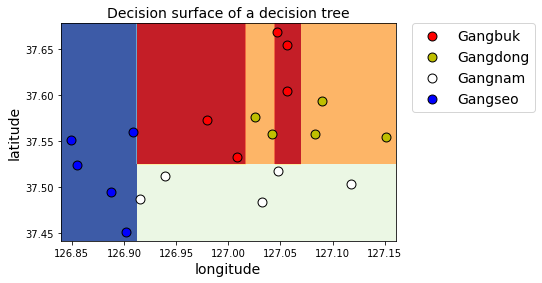

In [13]:
display_decision_surface(clf, X_train, y_encoded)

graphviz 라이브러리를 이용한 의사 결정 트리 시각화.  

pip install graphviz를 실행해서 graphviz 라이브러리를 설치하고 재부팅한다. 를 사용하려면 아래의 과정을 먼저 실행해야한다.  
https://graphviz.org/download/ 에서 graphviz 설치 파일을 다운받아 설치한다.    
path 환경 변수에 C:\Program Files\Graphviz\bin를 추갛나다(8.1.0 버전부터는 자동으로 추가할 수 있다.)
pip install graphviz를 실행해서 graphviz 라이브러리를 설치하고 재부팅한다. 


In [14]:
import graphviz
# graphviz 라이브러리의 데이터로 사용할 dot를 만들기 위해 import 한다.
from sklearn.tree import export_graphviz

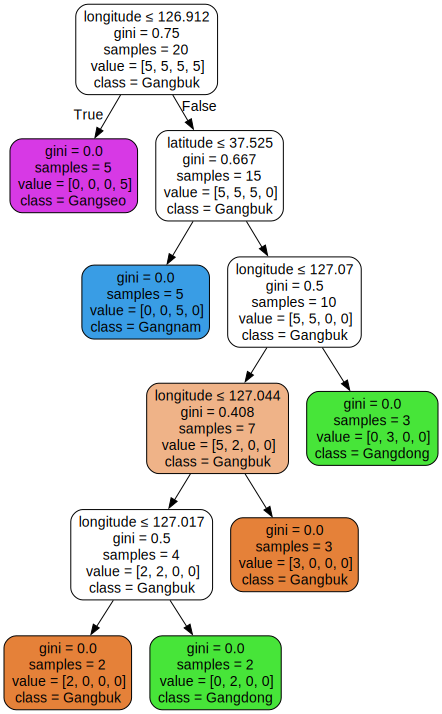

In [15]:
dot_data = export_graphviz(clf, out_file=None, feature_names=['longitude', 'latitude'], class_names=['Gangbuk','Gangdong', 'Gangnam', 'Gangseo'],
                           filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('./data/seoul1')
graph

과대 적합을 피하기 위한 파라미터를 설정해서 학습한다.

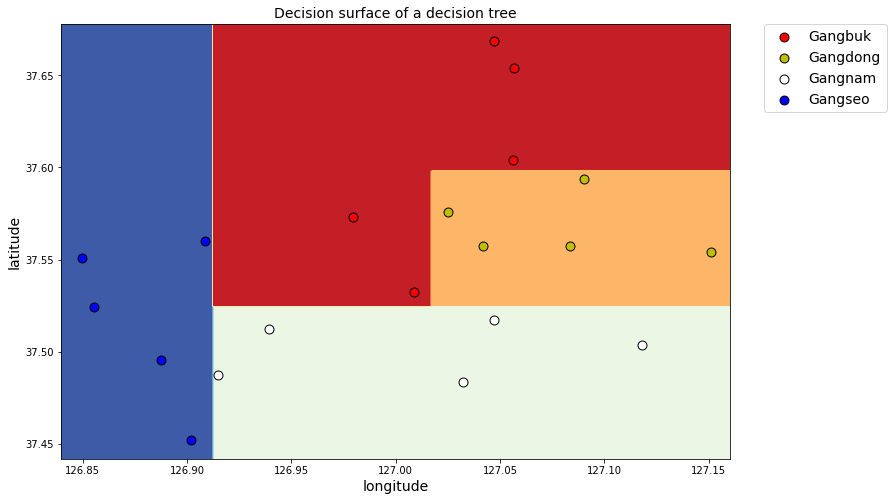

In [16]:
clf = DecisionTreeClassifier(
    random_state=70,
    max_depth=4, # 트리의 최대 깊이, 과대 적합을 방지하려면 max_depth는 지정해주는 것이 좋다.
    min_samples_split=2, # 자식 노드를 가지기 위한 최소한의 데이터 개수
    min_samples_leaf =2 # 리프(터미널, 단노드) 노드의 최소 데이터 개수 
).fit(X_train,y_encoded)
display_decision_surface(clf, X_train, y_encoded)

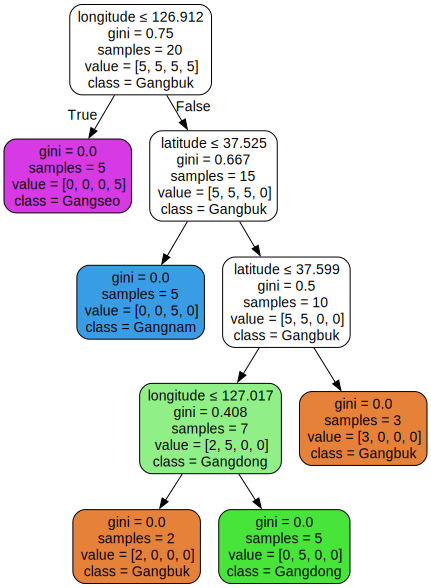

In [17]:
dot_data = export_graphviz(clf, out_file=None, feature_names=['longitude', 'latitude'], class_names=['Gangbuk','Gangdong', 'Gangnam', 'Gangseo'],
                           filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('./data/seoul2')
graph

In [18]:
predict = clf.predict(X_test) # 모델 테스트 정확도를 예측한다.
print(predict)
accuracy = accuracy_score(Y_test.values.ravel(), le.classes_[predict])
print('정확도: {:6.2%}'.format(accuracy))

[3 3 3 3 3 2 2 2 2 2 0 0 0 0 0 1 1 1 1 1]
정확도: 100.00%


In [19]:
comparison = pd.DataFrame({'실제값': Y_test.values.ravel(), '예측값': le.classes_[predict]})
comparison

,실제값,예측값
0,Gangseo,Gangseo
1,Gangseo,Gangseo
2,Gangseo,Gangseo
3,Gangseo,Gangseo
4,Gangseo,Gangseo
5,Gangnam,Gangnam
6,Gangnam,Gangnam
7,Gangnam,Gangnam
8,Gangnam,Gangnam
9,Gangnam,Gangnam


임의의 데이터 테스트

In [20]:
# 구 데이터 
district_dict_list = [
            {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
            {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangnam'},
            {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
            {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangdong'},
            {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
]
test_df = pd.DataFrame(dong_dict_list)
X_test = test_df[['longitude','latitude']]
Y_test = test_df[['label']]

In [21]:
predict = clf.predict(X_test) # 모델 테스트 정확도를 예측한다.
print(predict)
accuracy = accuracy_score(Y_test.values.ravel(), le.classes_[predict])
print('정확도: {:6.2%}'.format(accuracy))

[3 3 3 3 3 2 2 2 2 2 0 0 0 0 0 1 1 1 1 1]
정확도: 100.00%


In [22]:
comparison = pd.DataFrame({'실제값': Y_test.values.ravel(), '예측값': le.classes_[predict]})
comparison

,실제값,예측값
0,Gangseo,Gangseo
1,Gangseo,Gangseo
2,Gangseo,Gangseo
3,Gangseo,Gangseo
4,Gangseo,Gangseo
5,Gangnam,Gangnam
6,Gangnam,Gangnam
7,Gangnam,Gangnam
8,Gangnam,Gangnam
9,Gangnam,Gangnam
